In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm

In [2]:
xs = np.load('./data/xs.npy')
ys = np.load('./data/ys.npy')
omegas = np.load('./data/rho1omega.npy')
gammas = np.load('./data/rho1gammas.npy')
ratios = np.load('./data/rho1ratios.npy')

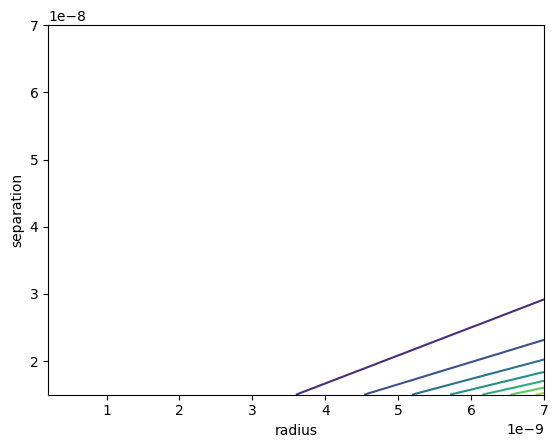

In [3]:
plt.xlabel("radius")
plt.ylabel("separation")
plt.contour(xs,ys,omegas)
plt.show()

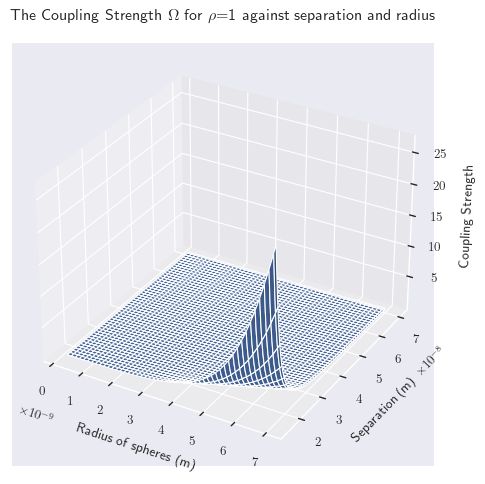

In [20]:
fig = plt.figure()
import matplotlib
matplotlib.rcParams['text.usetex'] = True
ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(xs, ys, ratios, cmap='viridis')
ax.set_zlabel("Coupling Strength")
ax.set_xlabel("Radius of spheres (m)")
ax.set_ylabel("Separation (m)")
fig.suptitle(r"The Coupling Strength $\Omega$ for $\rho$=1 against separation and radius")
plt.tight_layout()
ax.plot_surface(xs, ys, gammas)
ax.plot_surface(xs, ys, omegas)
#plt.savefig('./omega.pdf')
plt.show()

In [13]:
idxs = np.where(omegas > 1)

In [14]:
bestidx = ratios[idxs].argmax()

In [15]:
bestR, bestsep = xs[idxs[0][bestidx], idxs[1][bestidx]], ys[idxs[0][bestidx], idxs[1][bestidx]]

In [16]:
bestR, bestsep

(6.93131313131313e-09, 4.166666666666667e-08)

In [17]:
omegas[idxs[0][bestidx], idxs[1][bestidx]]

1.0011459783453736

In [18]:
ratios[idxs[0][bestidx], idxs[1][bestidx]]

4.843742744568618

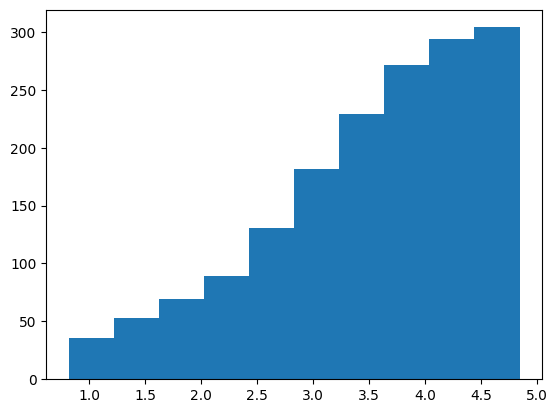

In [19]:
plt.hist(ratios[idxs], bins=10)
plt.show()

In [20]:
ratios[idxs]

array([4.73473713, 4.6174618 , 4.50544285, ..., 4.74327459, 4.84374274,
       4.80091222])

In [22]:
def get_best_ratio(rho, omegavar=1):
    omegas = np.load(f'./data/rho{rho}omega.npy')
    gammas = np.load(f'./data/rho{rho}gammas.npy')
    ratios = np.load(f'./data/rho{rho}ratios.npy')
    idxs = np.where(omegas > omegavar)
    bestidx = ratios[idxs].argmax()
    bestR, bestsep = xs[idxs[0][bestidx], idxs[1][bestidx]], ys[idxs[0][bestidx], idxs[1][bestidx]]
    bestratio = ratios[idxs[0][bestidx], idxs[1][bestidx]]
    return rho, bestR, bestsep, bestratio


In [34]:
rhos = [0.1,0.2,0.5,1,1.5,2.5,3,5]
bestRs, bestseps, bestratios = [],[],[]
for rho in rhos:
    _, bestR, bestsep, bestratio = get_best_ratio(rho)
    bestRs.append(bestR)
    bestseps.append(bestsep)
    bestratios.append(bestratio)
    

In [6]:
import seaborn as sns
sns.set_theme(context='paper')
import matplotlib
matplotlib.rcParams['text.usetex'] = True
fig = plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace= 0.25, hspace= 0.25)
sub1 = fig.add_subplot(2,2,(1,2))
sub2 = fig.add_subplot(2,2,3) 
sub3 = fig.add_subplot(2,2,4) 
sub1.plot(rhos,bestratios)
sub1.set_title(r'The largest Quality Factor against density with $\Omega>1$')
sub1.set_ylabel(r'Best Quality factor $\frac{\Omega}{\Gamma}$')
sub2.plot(rhos, bestRs, 'bo')
sub2.set_ylabel("Radius (nm)")
sub2.set_title('Best radius against density')
sub3.set_ylabel("Best separation (10s of nm)")
sub3.set_title('Best separation against density')
sub3.plot(rhos,bestseps, 'bo')
fig.supxlabel(r"Density ($\frac{1}{\rm{nm}^3}$)")
plt.savefig('./optimization.pdf')
plt.show()

NameError: name 'rhos' is not defined